In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker
import numpy as np
from scipy import stats
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
#读取数据
path = r'C:\Users\14253\Desktop\数据科学\datasets\law+'
df = pd.read_csv(path + '\\2004-2023law.csv',low_memory=False)

In [3]:
#预处理数据
df.dropna(subset=["归属机构"],inplace=True)


In [4]:
#整理国际归属
countries=dict()
for i in df.index:
    address=df.at[i,"归属机构"];country=''
    for j in address:
        if j==';':
            country=country[1:]
            if country=="Russian Federation":
                country="Russia"
            try:
                countries[country]+=1
            except:
                countries[country]=1
            country=''
        elif j in ",./<>?\"[]{}\\|`~!@#$%^&*-=_+1234567890":
            country=''
        else:
            country+=j
df2=pd.DataFrame({'国家':list(countries.keys()),'数量':list(countries.values())})
df2.sort_values("数量",ascending=False,inplace=True)
df2.head(100)


,国家,数量
1,United States,11935
18,China,3483
6,United Kingdom,2382
16,Australia,1745
0,Canada,1434
...,...,...
219,Sri Lanka,13
258,Malawi,12
231,Mongolia,11
271,Costa Rica,11


In [5]:
# 绘制热力图
x=df2['国家']
y=df2['数量']
value = list(y)
attr = list(x)
 
data = []
for index in range(len(attr)):
    city_ionfo=[attr[index],value[index]]
    data.append(city_ionfo)
 
c = (
    Map()
    .add("世界热力地图",data, "world")
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="世界热力地图"),
        visualmap_opts=opts.VisualMapOpts(max_=2000),
 
    )
    .render()
)

d:\anaconda3\Lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [6]:
df2.insert(2,"GDP",np.nan)
df_gdp=pd.read_csv(r"C:\Users\14253\Desktop\数据科学\datasets\世界各国GDP结构数据 2000-2021.csv",low_memory=False)
df_gdp=df_gdp[df_gdp['年份']==2021]
df_gdp.set_index("地区名称",inplace=True)
for i in df2.index:
    if df2.at[i,"国家"] in df_gdp.index:
        df2.at[i,"GDP"] = df_gdp["GDP"][df2.at[i,"国家"]]
df2.dropna(subset=["GDP"],inplace=True)
df3=df2.drop("国家",axis=1)
stats.pearsonr(df3['数量'], df3['GDP'])

PearsonRResult(statistic=0.9100934361845144, pvalue=1.6917411173749356e-53)

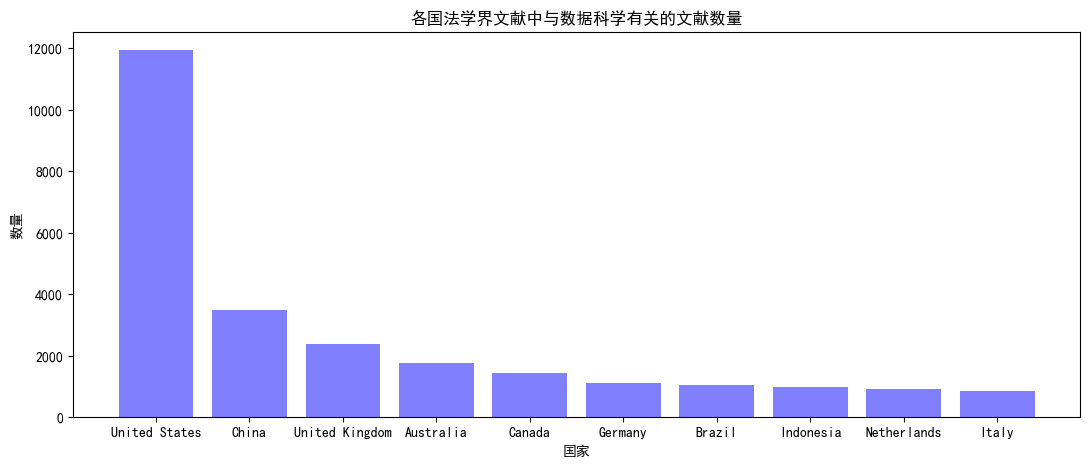

In [7]:
#可视化
df2=df2.head(10)
x=df2['国家']
y=df2['数量']
plt.figure(figsize=(13,5))
plt.bar(x,y,color='blue',alpha=0.5,label='数量')
plt.xlabel('国家')
plt.ylabel('数量')
plt.title('各国法学界文献中与数据科学有关的文献数量')
plt.show()